<a href="https://colab.research.google.com/github/taizun-jj202/Neural_Networks/blob/digit_recog/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing all the required libraries

import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [ ]:
#Running the NN on a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
#Definig the different parameters
num_epochs = 10
num_classes = 10 #Multi-class clasification (i.e there are 10 digits)
learning_rate = 0.001
batch_size = 50
input_size = 784 #Because we flatten a 28*28 image into a single row and feed the row as input
hidden_layers = 100

In [ ]:
train_data = torchvision.datasets.MNIST(root = "./dataset", train = True, transform = transforms.ToTensor(), download = True)
test_data = torchvision.datasets.MNIST(root = "./dataset", train = False, transform = transforms.ToTensor(), download = True)
print("Size of training data: {}".format(len(train_data)))
print("Size of testing data : {}".format(len(test_data)))

#Below lines give us the samples for training and testing
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True, num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False, num_workers=2)


Size of training data: 60000
Size of testing data : 10000


In [ ]:
#Checking if the data has been properly assigned/shaped or not
checkdata = iter(train_loader)
img, lab = next(checkdata)
print(img.shape, lab.shape)

torch.Size([50, 1, 28, 28]) torch.Size([50])


tensor(7)
tensor(5)
tensor(7)
tensor(7)
tensor(4)
tensor(6)
tensor(8)
tensor(1)
tensor(1)


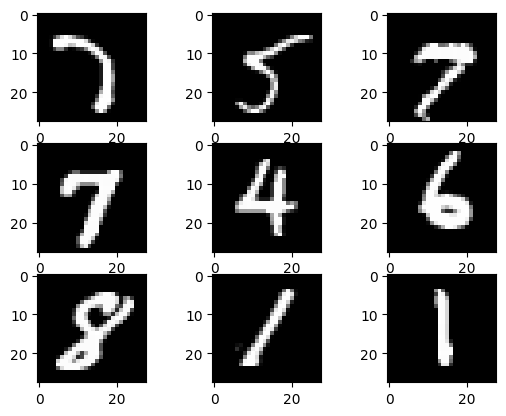

In [ ]:
for i in range(9):
  print(lab[i])
  plt.subplot(3,3,i+1)
  plt.imshow(img[i][0], cmap = "gray")
plt.show()

In [5]:
#Actual Digital Recognition logic 

class digit_recon(nn.Module):

  def __init__(self, input_size, hidden_layers, num_classes):
    super(digit_recon, self).__init__()
    #First layer is given below
    self.input = nn.Linear(in_features = input_size, out_features = hidden_layers)
    self.relu_1 = nn.ReLU() #Invoking the activation function
    self.hidden_1 = nn.Linear(in_features = hidden_layers, out_features = hidden_layers)
    self.relu_2 = nn.ReLU()
    self.hidden_2 = nn.Linear(in_features = hidden_layers, out_features = hidden_layers)
    self.relu_3 = nn.ReLU()
    self.hidden_3 = nn.Linear(in_features = hidden_layers, out_features = hidden_layers)
    self.relu_4 = nn.ReLU() 
    self.output = nn.Linear(in_features = hidden_layers, out_features = num_classes)

  def forward(self,x):  
    model = self.input(x)
    model = self.relu_1(model)
    model = self.hidden_1(model)
    model = self.relu_2(model)
    model = self.hidden_2(model)
    model = self.relu_3(model)
    model = self.hidden_3(model)
    model = self.relu_4(model)
    model = self.output(model)

    return model


NameError: ignored

In [4]:
#Visualising the neural network
model = digit_recon(input_size, hidden_layers, num_classes)
repr(model)

NameError: ignored

In [ ]:
#Defining the Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
#Code for training the model

#checking the number of samples
samples = len(train_loader)
samples

1200

In [ ]:
model = model.to(device)

In [ ]:
#Training loop that sets the weights and biases
for epoch in range(num_epochs):
  #Loop for batch training
  for (images, labels) in train_loader:
    images = images.reshape(-1,784).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backpropagating
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print("Epoch : {}/{}, step: {}/{}, Loss: {:.4f}".format(epoch,num_epochs,step,samples,loss.item()))

In [ ]:
print (outputs.shape)

torch.Size([50, 10])


In [ ]:
#Finding the accuracy of the model

def model_test():
    with torch.no_grad(): #Disables gradient calculation
      correct = 0
      tot_samples = 0

      for (images, lab) in test_loader:
        images = images.reshape(-1,784).to(device)
        lab = lab.to(device)

        #Getting the highest predicted value for the classes
        #Highest probability given to the class that model predicts is correct
        outputs = model(images)
        _ , predicted = torch.max(outputs,1)
        tot_samples += len(lab)
        correct += (predicted == lab).sum().item()

    accuracy = 100 * (correct / tot_samples)
    print("Accuracy : {}".format(accuracy))

model_test()

Accuracy : 97.88


In [ ]:
#Saving the model
from google.colab import drive
drive.mount('/content/gdrive')
PATH = "/content/gdrive/My Drive/Saved_NN_Models/digit_recognizer.pt"
torch.save(model.state_dict(), '/content/gdrive/My Drive/Saved_NN_Models/digit_recognizer.pt')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Loading the values that we saved prior 
model.load_state_dict(torch.load('/content/gdrive/My Drive/Saved_NN_Models/digit_recognizer.pt'))

<All keys matched successfully>

In [ ]:
#Testing the accuracy of the model after importing the saved wieghts and biases
model_test()

Accuracy : 97.88
